In [7]:
#import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


## Create the data

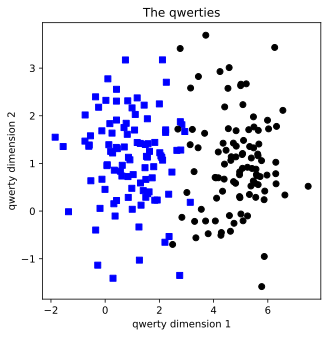

In [8]:
#Create data

nPerClust = 100
blur = 1

A = [ 1, 1]
B = [ 5, 1]

#generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

#true labels

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))


#concatenate into a matrix
data_np = np.hstack((a,b)).T

#convert to pytorch tensor

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


## Functions to build and train the model

In [9]:
#Function that creates the model
def createANNmodel(learningRate):
    
    ANNclassify = nn.Sequential(
    nn.Linear(2,1), #input layer
    nn.ReLU(), #activation unit
    nn.Linear(1,1), #output unit
    #nn.Sigmoid(), #final activation unit (not needed, using BCEWithLogitsLoss)
    )

    #loss function
    lossfun = nn.BCEWithLogitsLoss()

    #optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

    #model output
    return ANNclassify, lossfun, optimizer


In [10]:
#Function that trains the model

#Fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):
    #initialize losses
    losses = torch.zeros(numepochs)

    #loop over epochs
    for epoch_idx in range(numepochs):

        #forward pass
        yHat = ANNmodel(data)

        #compute loss
        loss = lossfun(yHat, labels)
        losses[epoch_idx] = loss 

        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #final forward pass
    predictions = ANNmodel(data)

    #compute the predictions and report accuracy
    #Note.
    totalacc = 100*torch.mean(((predictions>0) == labels).float())

    return losses,predictions,totalacc

## Test new code by running it once

Final accuracy : 93%


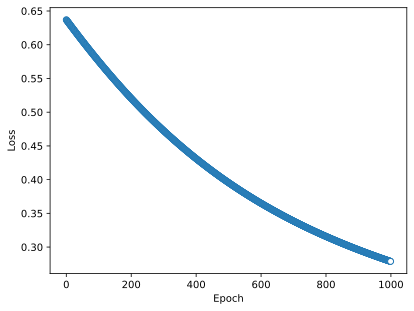

In [11]:
# Create everything

ANNclassify, lossfun, optimizer = createANNmodel(.01)

# Run it
losses, predictions, totalacc = trainTheModel(ANNclassify)

# Report accuracy
print('Final accuracy : %g%%' %totalacc)

# Show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Experiments

In [12]:
# Set of learning rates to test
learningrates = np.linspace(.001,.1,40)

#initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

#loop through learning rates
for i,lr in enumerate(learningrates):

    #Create and run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses,predictions,totalacc = trainTheModel(ANNclassify)

    #store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

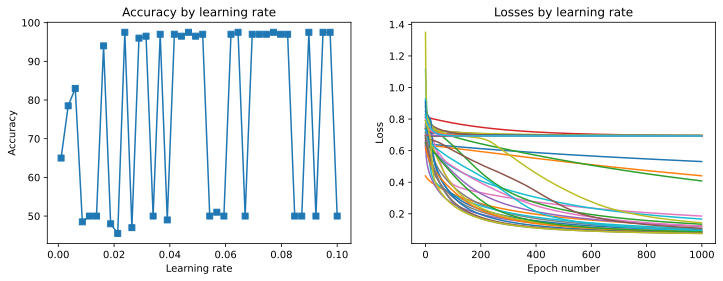

In [13]:
# Plot the results
fig,ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(learningrates,accByLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [14]:
# Proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.5750)

## Meta-experiment to get more reliable results

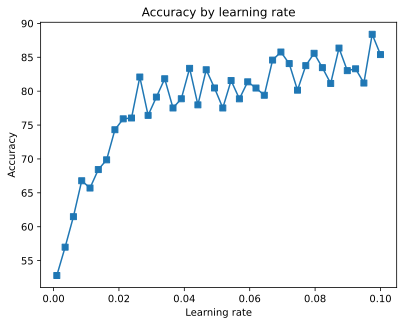

In [17]:
#Number of times to iterate through the experiment
numExps = 50

#Matrix sto store all the results
accMeta = np.zeros((numExps, len(learningrates)))

#fewer epochs to reduce computation time
numepochs = 500

#For the experiment
for exp_idx in range(numExps):
    for i,lr in enumerate(learningrates):

        #Create and run the model
        ANNclassify, lossfun, optimizer = createANNmodel(lr)
        losses, predictions, totalacc = trainTheModel(ANNclassify)

        #Store the results
        accMeta[exp_idx,i] = totalacc

#Plot the results, averaged over experiments
plt.plot(learningrates, np.mean(accMeta, axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

## Aditional Explorations

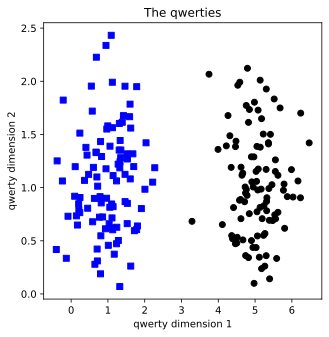

In [34]:
# 1) The closeness of the qwerties groups is determined by the XY locations of the centroids, and by the blur parameter.
#    Try increasing or decreasing the blur (e.g., to 2 or .5). How does this affect the number of times that the model
#    successfully learned to categorize the two conditions?
#Create data

nPerClust = 100
blur = .5

A = [ 1, 1]
B = [ 5, 1]

#generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

#true labels

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))


#concatenate into a matrix
data_np = np.hstack((a,b)).T

#convert to pytorch tensor

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


Final accuracy : 91.5%


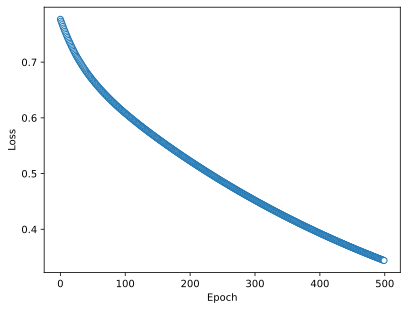

In [40]:
# Create everything

ANNclassify, lossfun, optimizer = createANNmodel(.01)

# Run it
losses, predictions, totalacc = trainTheModel(ANNclassify)

# Report accuracy
print('Final accuracy : %g%%' %totalacc)

# Show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()